# Multiple Linear Regression
## Bike Sharing Assignment

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

**So interpretation is important!**

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
# read the csv file
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Processing
We do not have any missing values in the dataset.

In [4]:
# check the number of unique values in the column
df['instant'].nunique()

730

Instant column is just a incremental id column. Let us drop that.

In [5]:
df.drop('instant', axis=1, inplace=True)

In [6]:
# convert the data type from object to date
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


In [7]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We see a humidity value of 0, which is practically impossible on earth.

So let us replace it with median

In [8]:
# display records with 0 humidity
df[df['hum']==0]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,2018-10-03,1,0,3,0,4,1,3,15.952731,19.2834,0.0,17.545759,46,577,623


In [9]:
# replace 0 hum with median value
df['hum'] = df['hum'].replace(0, df['hum'].median())

## Exploratory Data Analysis (EDA)

We see that season, yr, mnth, holiday, weekday, workingday, weathersit are categorical variables

Temp, atemp, hum, windspeed are numeric variables. All the values are well within the natural range. They do not contain any outliers

The dataset is neat and clean. We can proceed with our analysis keeping 'cnt' as the target variable

Let us visualize the data and perfrom EDA to get better understanding of variables

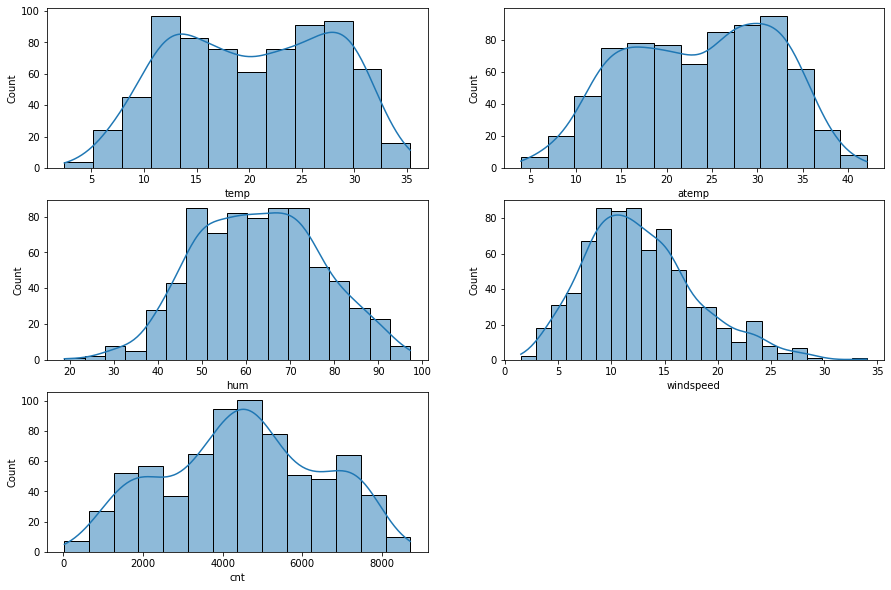

In [10]:
plt.figure(figsize=[15,10])
plt.subplot(3,2,1)
sns.histplot(data=df, x='temp', kde=True)

plt.subplot(3,2,2)
sns.histplot(data=df, x='atemp', kde=True)

plt.subplot(3,2,3)
sns.histplot(data=df, x='hum', kde=True)

plt.subplot(3,2,4)
sns.histplot(data=df, x='windspeed', kde=True)

plt.subplot(3,2,5)
sns.histplot(data=df, x='cnt', kde=True)

plt.show()

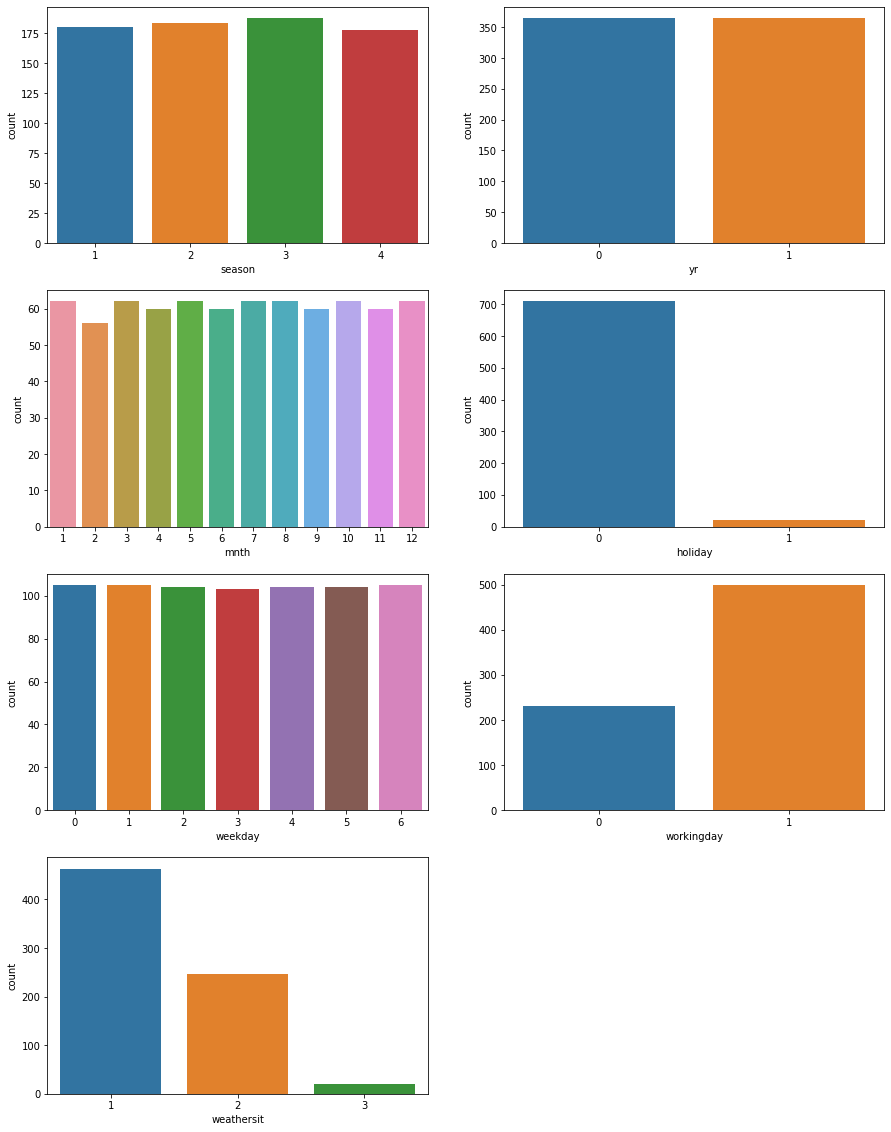

In [11]:
# count the number of values for each variable
plt.figure(figsize=[15,20])
plt.subplot(4,2,1)
sns.countplot(data=df, x='season')

plt.subplot(4,2,2)
sns.countplot(data=df, x='yr')

plt.subplot(4,2,3)
sns.countplot(data=df, x='mnth')

plt.subplot(4,2,4)
sns.countplot(data=df, x='holiday')

plt.subplot(4,2,5)
sns.countplot(data=df, x='weekday')

plt.subplot(4,2,6)
sns.countplot(data=df, x='workingday')

plt.subplot(4,2,7)
sns.countplot(data=df, x='weathersit')
plt.show()

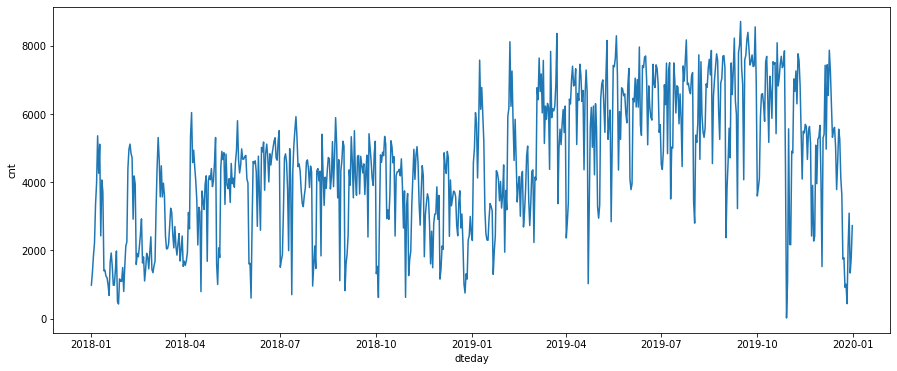

In [12]:
# plot the month and year wise users
plt.figure(figsize=[15,6])
sns.lineplot(data=df, x='dteday', y='cnt')
plt.show()

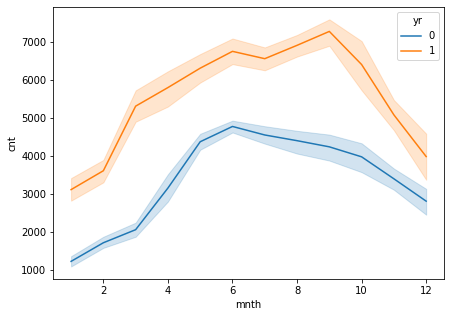

In [13]:
# plot the month and year wise users
plt.figure(figsize=[7,5])
sns.lineplot(data=df, x='mnth', y='cnt', hue='yr')
plt.show()

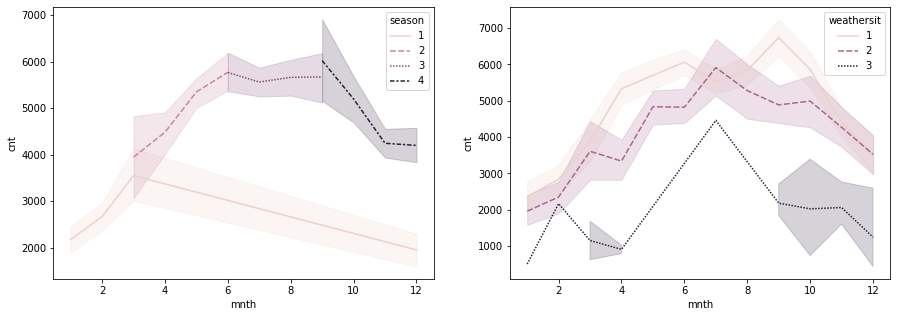

In [14]:
# plot the users as per season and weather for each month
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.lineplot(data=df, x='mnth', y='cnt', hue='season', style='season')

plt.subplot(1,2,2)
sns.lineplot(data=df, x='mnth', y='cnt', hue='weathersit', style='weathersit')
plt.show()

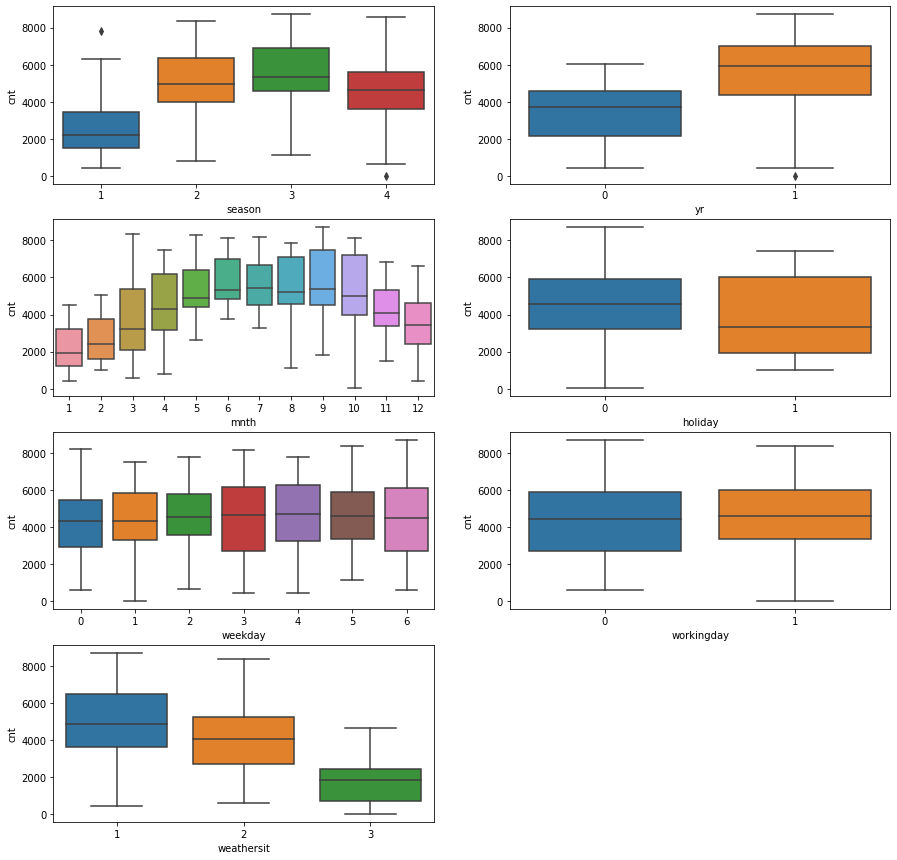

In [15]:
# boxplot for some variables wrt number of users
plt.figure(figsize=[15,15])
plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(4,2,2)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(4,2,3)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.subplot(4,2,4)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data=df)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

### Observations:

1. Number of users in summer and fall (season 2 and 3) are high than others
2. Number of users have increased in 2019 from what it was in 2018
3. We see more users in the middle of the year
4. From the weathersit plot, we see that the users are more in the clear sky or partly cloudy conditions than rainy weather
5. The median of users on a holiday is slightly less than those on not a holiday
6. Most of the weekday(1,2,3,4,5) have workingDay as 1 if it is not a holiday


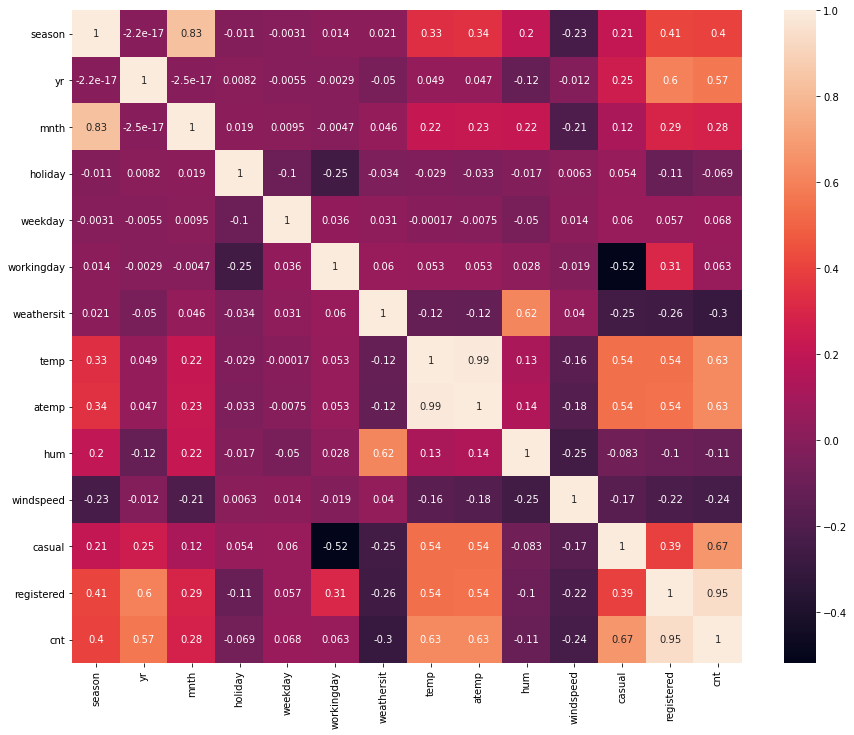

In [16]:
# heatmap to visualize correlation
plt.figure(figsize=[15,12])
sns.heatmap(df.corr(), annot=True)
plt.show()

### Observations
We see that temp and atemp has very high correlation, which was expected.

Also, year and temp have a strong relationship with cnt.

### Deleting unwanted variables
We know that cnt=casual + registered. We will not have casual and registered variable during prediction. So let us drop them as it will affect (increase) the test scores as well.

Also, we can drop the dteday column as we have other columns like year, month, weekday, season, etc capturing the esssence of the date

In [17]:
df.drop(['casual','registered','dteday'], axis=1, inplace=True)

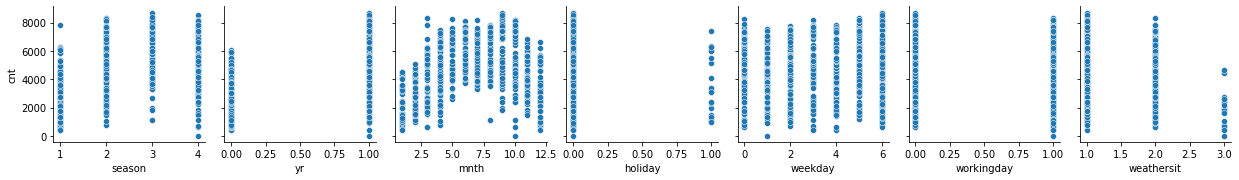

In [18]:
sns.pairplot(data=df, y_vars='cnt', 
             x_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit'], 
             diag_kind=None)
plt.show()

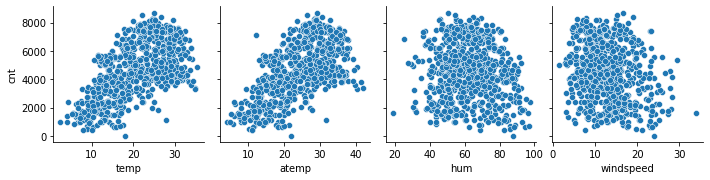

In [19]:
sns.pairplot(data=df, y_vars='cnt', x_vars=['temp','atemp','hum','windspeed'], diag_kind=None)
plt.show()

### Choice of model
We see a linear relationship between temperature and cnt variables.

Hence, Linear Regression would be a good choice for our model.

We have some categorical variables. Hence, it is better to create dummy variables for them

In [20]:
# creating dummy variables with n-1 categories
df = pd.concat([df, pd.get_dummies(df['season'], prefix='season', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['mnth'], prefix='mnth', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['weekday'], prefix='weekday', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['weathersit'], prefix='weathersit', drop_first=True)], axis=1)

# drop the old columns
df.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


## Building a linear model

Let us build a bascis model with 1 variable and we will add more later

In [21]:
# splitting the dataset into train and test

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


First, let us scale the model so that we easily understand the coeficient values and it will also help in a faster convergence.

As we have both categorical and numerical values, a MinMaxScaler would be a good choice

In [22]:
scaler = MinMaxScaler()

# create list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.377528,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.692225,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


Defining some functions that will be used throughout the code

In [23]:
def fit_model_and_show_summary(colNames):
    # creating X and Y
    y_train = df_train['cnt']
    X_train = df_train[colNames]

    # adding constant to the X_train
    X_train_sm = sm.add_constant(X_train)

    # fit the model and print the summary
    lm = sm.OLS(y_train, X_train_sm).fit()
    return lm.summary()

In [24]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [25]:
# Model-1
x_vars = ['temp']
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           2.46e-61
Time:                        22:54:34   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
We have got a decent R2 value.

The p-value of temp is 0, meaning that it is significant variable.

Let us add 'yr' as it also has a high correlation with cnt

In [26]:
# Model-2
x_vars = ['temp','yr']
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.34e-130
Time:                        22:54:35   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding more variables

Let us now add weathersit and season 1 by 1, as we have seen its impact on cnt in boxplots above

In [27]:
# Model-3
x_vars = ['temp','yr','weathersit_2','weathersit_3']
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     359.3
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.56e-146
Time:                        22:54:35   Log-Likelihood:                 382.41
No. Observations:                 510   AIC:                            -754.8
Df Residuals:                     505   BIC:                            -733.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1213      0.015      8.257      0.000       0.092       0.150
temp             0.5664      0.023     24.854      0.000       0.522       0.611
yr               0.2317      0.010     22.597      0.000       0.212       0.252
weathersit_2    -0.0647      0.011     -5.967      0.000      -0.086      -0.043
weathersit_3    -0.2547      0.030     -8.369      0.000      -0.315      -0.195
==============================================================================
Omnibus:                       12.494   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.124
Skew:                          -0.335   Prob(JB):                      0.00141
Kurtosis:                       3.409   Cond. No.                         7.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# VIF for Model-3
calculate_vif(df_train[x_vars])

,Features,VIF
0,temp,2.198050
1,yr,1.908989
2,weathersit_2,1.380892
3,weathersit_3,1.029446


In [29]:
# Model-4
x_vars = ['temp','yr','weathersit_2','weathersit_3','season_2','season_3','season_4']
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     297.7
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.75e-174
Time:                        22:54:35   Log-Likelihood:                 456.88
No. Observations:                 510   AIC:                            -897.8
Df Residuals:                     502   BIC:                            -863.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0733      0.015      4.983      0.000       0.044       0.102
temp             0.4797      0.035     13.536      0.000       0.410       0.549
yr               0.2334      0.009     26.216      0.000       0.216       0.251
weathersit_2    -0.0716      0.009     -7.601      0.000      -0.090      -0.053
weathersit_3    -0.2901      0.027    -10.921      0.000      -0.342      -0.238
season_2         0.1230      0.016      7.560      0.000       0.091       0.155
season_3         0.0954      0.022      4.395      0.000       0.053       0.138
season_4         0.1683      0.014     12.250      0.000       0.141       0.195
==============================================================================
Omnibus:                       71.302   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.694
Skew:                          -0.709   Prob(JB):                     3.51e-40
Kurtosis:                       5.557   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# VIF for Model-4
calculate_vif(df_train[x_vars])

,Features,VIF
0,temp,11.147571
5,season_3,5.686462
4,season_2,3.315537
6,season_4,2.368227
1,yr,1.976494
2,weathersit_2,1.439465
3,weathersit_3,1.056409


### Observations:
We have a good value of R2 (80%) till now. It has increased by addition of each variable.

Also we have low p-values for all the variables till now. Which means all of them are significant variables.
P(F-statistic) is very low indicating that model fit is also significant

#### Coefficients:
- Temp has a coefficient value of 0.48, which is expected as we have seen a high correlation and a linear relationship betweel temp and cnt
- Year has a positive coefficient value. That is because we have more users in 2019
- Weathersit variables have a negative coefficient value. This is also expected as we have seen in the boxplot that we have more users in the clear sky


However, we have a high VIF value of temp variable after addition of season.
This is because temp and season have a correlation of 0.33 as we have seen in our heatmap.

Let us try to remove either temp or season from the model and see the results

In [31]:
# Model-5
x_vars = ['yr','weathersit_2','weathersit_3','season_2','season_3','season_4']
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     232.5
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.55e-141
Time:                        22:54:35   Log-Likelihood:                 377.54
No. Observations:                 510   AIC:                            -741.1
Df Residuals:                     503   BIC:                            -711.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2131      0.012     17.409      0.000       0.189       0.237
yr               0.2465      0.010     23.868      0.000       0.226       0.267
weathersit_2    -0.0823      0.011     -7.510      0.000      -0.104      -0.061
weathersit_3    -0.3042      0.031     -9.818      0.000      -0.365      -0.243
season_2         0.2623      0.015     17.828      0.000       0.233       0.291
season_3         0.3360      0.015     23.140      0.000       0.307       0.365
season_4         0.2405      0.015     16.277      0.000       0.211       0.270
==============================================================================
Omnibus:                       37.080   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.218
Skew:                          -0.364   Prob(JB):                     1.56e-20
Kurtosis:                       4.940   Cond. No.                         7.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Model-6
x_vars = ['temp','yr','weathersit_2','weathersit_3','season_2','season_4']
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     332.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.52e-171
Time:                        22:54:35   Log-Likelihood:                 447.25
No. Observations:                 510   AIC:                            -880.5
Df Residuals:                     503   BIC:                            -850.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0523      0.014      3.689      0.000       0.024       0.080
temp             0.6074      0.021     29.359      0.000       0.567       0.648
yr               0.2310      0.009     25.534      0.000       0.213       0.249
weathersit_2    -0.0700      0.010     -7.302      0.000      -0.089      -0.051
weathersit_3    -0.2858      0.027    -10.573      0.000      -0.339      -0.233
season_2         0.0697      0.011      6.310      0.000       0.048       0.091
season_4         0.1329      0.011     11.731      0.000       0.111       0.155
==============================================================================
Omnibus:                       56.723   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.775
Skew:                          -0.601   Prob(JB):                     6.60e-29
Kurtosis:                       5.159   Cond. No.                         8.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# VIF for Model-6
calculate_vif(df_train[x_vars])

,Features,VIF
0,temp,2.579746
1,yr,1.936747
4,season_2,1.441971
2,weathersit_2,1.433928
5,season_4,1.324431
3,weathersit_3,1.056392


### Observation:

By removing temp, R2 drops at lot. 

But by removing season_3, we have managed to keep similar value of R2 and also reduce multicollinearity.

Adding windspeed now

In [34]:
# Model-7
x_vars = ['temp','yr','season_2','season_4','weathersit_2','weathersit_3','windspeed']
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     311.5
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.78e-178
Time:                        22:54:35   Log-Likelihood:                 466.25
No. Observations:                 510   AIC:                            -916.5
Df Residuals:                     502   BIC:                            -882.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1207      0.018      6.885      0.000       0.086       0.155
temp             0.5786      0.020     28.253      0.000       0.538       0.619
yr               0.2324      0.009     26.626      0.000       0.215       0.250
season_2         0.0766      0.011      7.152      0.000       0.056       0.098
season_4         0.1251      0.011     11.380      0.000       0.103       0.147
weathersit_2    -0.0723      0.009     -7.822      0.000      -0.090      -0.054
weathersit_3    -0.2702      0.026    -10.321      0.000      -0.322      -0.219
windspeed       -0.1654      0.027     -6.232      0.000      -0.217      -0.113
==============================================================================
Omnibus:                       57.723   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.350
Skew:                          -0.589   Prob(JB):                     2.02e-31
Kurtosis:                       5.294   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# VIF for Model-7
calculate_vif(df_train[x_vars])

,Features,VIF
0,temp,3.326381
6,windspeed,3.008351
1,yr,1.999693
2,season_2,1.503080
4,weathersit_2,1.470910
3,season_4,1.364660
5,weathersit_3,1.075760


Let us add a lag variable containing users of last week (1 week difference), and see our model's performance

In [36]:
# Create lag variable 
df_train['lag_cnt'] = np.roll(df_train['cnt'], 7)
df_train['lag_cnt'][:7] = 0

In [37]:
# Model-8
x_vars = ['temp','yr','weathersit_2','weathersit_3','season_2','season_4','windspeed','lag_cnt']
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     272.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          5.26e-177
Time:                        22:54:35   Log-Likelihood:                 466.53
No. Observations:                 510   AIC:                            -915.1
Df Residuals:                     501   BIC:                            -876.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1136      0.020      5.687      0.000       0.074       0.153
temp             0.5784      0.020     28.232      0.000       0.538       0.619
yr               0.2320      0.009     26.541      0.000       0.215       0.249
weathersit_2    -0.0722      0.009     -7.809      0.000      -0.090      -0.054
weathersit_3    -0.2697      0.026    -10.290      0.000      -0.321      -0.218
season_2         0.0765      0.011      7.135      0.000       0.055       0.098
season_4         0.1250      0.011     11.368      0.000       0.103       0.147
windspeed       -0.1646      0.027     -6.194      0.000      -0.217      -0.112
lag_cnt          0.0140      0.019      0.742      0.458      -0.023       0.051
==============================================================================
Omnibus:                       59.320   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.539
Skew:                          -0.602   Prob(JB):                     1.51e-32
Kurtosis:                       5.334   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation:

Upon addition of lag_cnt, R2 value remained the same.
Also, The lag_cnt variable has a very high p-value meaning it is insignificant.

So we will remove it from the model and add a new variable - Holiday

In [38]:
# dropping lag_cnt variable
df_train.drop('lag_cnt', axis=1, inplace=True)

In [39]:
# Model-9
x_vars = ['temp','yr','season_2','season_4','weathersit_2','weathersit_3','windspeed','holiday']
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.62e-179
Time:                        22:54:35   Log-Likelihood:                 471.61
No. Observations:                 510   AIC:                            -925.2
Df Residuals:                     501   BIC:                            -887.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1252      0.017      7.188      0.000       0.091       0.159
temp             0.5752      0.020     28.319      0.000       0.535       0.615
yr               0.2321      0.009     26.845      0.000       0.215       0.249
season_2         0.0751      0.011      7.063      0.000       0.054       0.096
season_4         0.1261      0.011     11.576      0.000       0.105       0.147
weathersit_2    -0.0737      0.009     -8.042      0.000      -0.092      -0.056
weathersit_3    -0.2739      0.026    -10.552      0.000      -0.325      -0.223
windspeed       -0.1639      0.026     -6.234      0.000      -0.216      -0.112
holiday         -0.0893      0.027     -3.263      0.001      -0.143      -0.036
==============================================================================
Omnibus:                       51.516   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.380
Skew:                          -0.544   Prob(JB):                     1.19e-26
Kurtosis:                       5.106   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# VIF for Model-9
calculate_vif(df_train[x_vars])

,Features,VIF
0,temp,3.326929
6,windspeed,3.030579
1,yr,1.999719
2,season_2,1.505377
4,weathersit_2,1.472020
3,season_4,1.370015
5,weathersit_3,1.077661
7,holiday,1.031886


### Observations:

Both windspeed and holiday have negative coefficients, which is same as per the boxplot and heatmap.



Till now, we have a model with decent R2 value and little to no multicollinearity.

Let us now build a model with all the variables and see the results

In [41]:
# Model-10
x_vars = list(df_train.columns)
x_vars.remove('cnt')
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.48
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.23e-180
Time:                        22:54:35   Log-Likelihood:                 527.37
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     481   BIC:                            -873.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1511      0.026      5.776      0.000       0.100       0.202
yr               0.2319      0.008     28.668      0.000       0.216       0.248
holiday         -0.0416      0.024     -1.757      0.080      -0.088       0.005
workingday       0.0436      0.009      4.654      0.000       0.025       0.062
temp             0.3861      0.142      2.716      0.007       0.107       0.665
atemp            0.0658      0.138      0.475      0.635      -0.206       0.338
hum             -0.1329      0.033     -3.999      0.000      -0.198      -0.068
windspeed       -0.1858      0.026     -7.016      0.000      -0.238      -0.134
season_2         0.0850      0.024      3.604      0.000       0.039       0.131
season_3         0.0425      0.030      1.416      0.157      -0.016       0.102
season_4         0.1515      0.026      5.833      0.000       0.100       0.203
mnth_2           0.0301      0.021      1.455      0.146      -0.011       0.071
mnth_3           0.0665      0.022      2.980      0.003       0.023       0.110
mnth_4           0.0643      0.034      1.916      0.056      -0.002       0.130
mnth_5           0.0905      0.036      2.502      0.013       0.019       0.162
mnth_6           0.0696      0.039      1.794      0.073      -0.007       0.146
mnth_7           0.0307      0.044      0.699      0.485      -0.056       0.117
mnth_8           0.0864      0.042      2.067      0.039       0.004       0.169
mnth_9           0.1508      0.037      4.035      0.000       0.077       0.224
mnth_10          0.0706      0.035      2.045      0.041       0.003       0.138
mnth_11          0.0234      0.033      0.713      0.476      -0.041       0.088
mnth_12          0.0194      0.027      0.730      0.466      -0.033       0.071
weekday_1       -0.0102      0.010     -1.043      0.297      -0.029       0.009
weekday_2       -0.0070      0.011     -0.629      0.530      -0.029       0.015
weekday_3        0.0051      0.011      0.488      0.626      -0.016       0.026
weekday_4        0.0028      0.011      0.255      0.799      -0.019       0.024
weekday_5        0.0113      0.011      1.007      0.315      -0.011       0.033
weekday_6        0.0536      0.015      3.681      0.000       0.025       0.082
weathersit_2    -0.0574      0.011     -5.369      0.000      -0.078      -0.036
weathersit_3    -0.2440      0.028     -8.842      0.000      -0.298      -0.190
==============================================================================
Omnibus:                       85.195   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.422
Skew:                          -0.813   Prob(JB):                     7.56e-52
Kurtosis:                       5.904   Cond. No.                     2.25e+15
===============

In [42]:
# VIF for Model-10
calculate_vif(df_train[x_vars])

,Features,VIF
24,weekday_4,inf
2,workingday,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
25,weekday_5,inf
1,holiday,inf
3,temp,446.137617
4,atemp,383.342682
5,hum,16.646990


### Observations:
    
We have a very good value of R2 & Adj, R2.

Prob (F-statistic) is low, which means that overall model fit is significant.

We see that the p-value of some variables are quite high.

Temp and atemp have a very high VIF, also atemp has a high p-value.
We have already seen a high correlation of the 2 variables.

So we will only consider 1 of them

### Recursive Feature Elimination (RFE)
We could eliminate the features 1 by 1. But it will be time consuimg.

Let us try RFE and check its results

In [43]:
# fit the LR model
lr = LinearRegression()

x_vars = list(df_train.columns)
x_vars.remove('cnt')
lr.fit(df_train[x_vars], df_train['cnt'])

rfe = RFE(lr, 14)
rfe = rfe.fit(df_train[x_vars], df_train['cnt'])

list(zip(df_train[x_vars].columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 3),
 ('season_4', True, 1),
 ('mnth_2', False, 13),
 ('mnth_3', False, 9),
 ('mnth_4', False, 11),
 ('mnth_5', False, 10),
 ('mnth_6', False, 12),
 ('mnth_7', False, 14),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 15),
 ('mnth_12', False, 16),
 ('weekday_1', False, 4),
 ('weekday_2', False, 5),
 ('weekday_3', False, 7),
 ('weekday_4', False, 8),
 ('weekday_5', False, 6),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [44]:
rfe_cols = df_train[x_vars].columns[rfe.support_]

# Model-11
fit_model_and_show_summary(rfe_cols)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          8.08e-192
Time:                        22:54:35   Log-Likelihood:                 518.60
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1665      0.024      6.821      0.000       0.119       0.215
yr               0.2287      0.008     28.599      0.000       0.213       0.244
holiday         -0.0557      0.027     -2.071      0.039      -0.109      -0.003
workingday       0.0442      0.012      3.827      0.000       0.021       0.067
temp             0.5322      0.022     24.149      0.000       0.489       0.575
hum             -0.1466      0.032     -4.636      0.000      -0.209      -0.084
windspeed       -0.1876      0.025     -7.395      0.000      -0.237      -0.138
season_2         0.1045      0.011      9.746      0.000       0.083       0.126
season_4         0.1347      0.012     11.300      0.000       0.111       0.158
mnth_8           0.0554      0.016      3.439      0.001       0.024       0.087
mnth_9           0.1249      0.016      7.745      0.000       0.093       0.157
mnth_10          0.0380      0.017      2.205      0.028       0.004       0.072
weekday_6        0.0521      0.015      3.586      0.000       0.024       0.081
weathersit_2    -0.0549      0.011     -5.195      0.000      -0.076      -0.034
weathersit_3    -0.2359      0.027     -8.730      0.000      -0.289      -0.183
==============================================================================
Omnibus:                       71.767   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.490
Skew:                          -0.720   Prob(JB):                     1.06e-39
Kurtosis:                       5.525   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# VIF for Model-11
calculate_vif(df_train[rfe_cols])

,Features,VIF
4,hum,13.422630
3,temp,9.561791
2,workingday,4.823960
5,windspeed,3.655754
12,weathersit_2,2.328676
7,season_4,2.220979
0,yr,2.022703
11,weekday_6,1.847181
6,season_2,1.835033
10,mnth_10,1.605607


### Observations:
From the above 2 models, we see that the weekday variables are not significant.
This is because Holiday and workingDay columns effectively contain the information of weekday, so we do not need the weekday column

Couple of month variables are significant. Let us add mnth_9 to our model-9 as it has a high coefficient value

We have a high coefficient value for the humidity variable. But we will not it add to the model because it is highly correlated with weathersit variable

In [46]:
# Model-12
x_vars = ['temp','yr','season_2','season_4','weathersit_2','weathersit_3','windspeed','holiday','mnth_9']
fit_model_and_show_summary(x_vars)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.83e-186
Time:                        22:54:35   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1259      0.017      7.508      0.000       0.093       0.159
temp             0.5480      0.020     27.360      0.000       0.509       0.587
yr               0.2329      0.008     27.962      0.000       0.216       0.249
season_2         0.0881      0.010      8.437      0.000       0.068       0.109
season_4         0.1293      0.011     12.314      0.000       0.109       0.150
weathersit_2    -0.0784      0.009     -8.844      0.000      -0.096      -0.061
weathersit_3    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
windspeed       -0.1532      0.025     -6.039      0.000      -0.203      -0.103
holiday         -0.0987      0.026     -3.738      0.000      -0.151      -0.047
mnth_9           0.1012      0.016      6.330      0.000       0.070       0.133
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# VIF for Model-12
calculate_vif(df_train[x_vars])

,Features,VIF
0,temp,3.676968
6,windspeed,3.055368
1,yr,2.000249
2,season_2,1.567137
4,weathersit_2,1.482415
3,season_4,1.374278
8,mnth_9,1.204695
5,weathersit_3,1.081094
7,holiday,1.035099


## Finalizing the model:
- Upon addition of month, R2 increased.

- Now we have a good value of R2, also difference between R2 & Adj. R2 is less

- Prob (F-statistic) is very low, which means that overall model fit is significant

- All the p-values are 0

- All the VIF values are less than 5, we do not have multicollinearity

- All the coefficients of independent variables are behaving as expected, as we have discussed earlier

Let us finalize the model-12 and continue

In [48]:
# fitting the final model-12 again to access the variables

# creating X and Y
y_train = df_train['cnt']
X_train = df_train[x_vars]

# adding constant to the X_train
X_train_sm = sm.add_constant(X_train)

# fit the model and print the summary
lm = sm.OLS(y_train, X_train_sm).fit()

## Residual analysis

In [49]:
# predict on train data
y_train_pred = lm.predict(X_train_sm)

In [50]:
# check the r2 score and mean square error for train set
print("R squared value: ", r2_score(y_train, y_train_pred))
print("Mean squared error: ", mean_squared_error(y_train, y_train_pred))

R squared value:  0.8303450237489229
Mean squared error:  0.008527871284848427


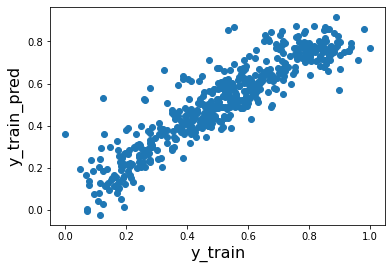

In [51]:
# Plot acutal vs predicted train values

plt.scatter(y_train, y_train_pred)
plt.xlabel('y_train', fontsize = 16) 
plt.ylabel('y_train_pred', fontsize = 16)   
plt.show()

#### Check for normal distribution of Error terms

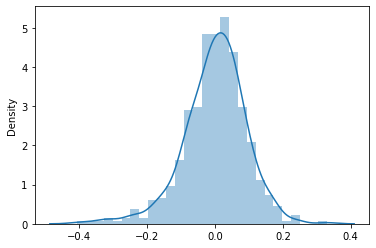

In [52]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

The error terms are normally distributed with mean 0

#### Check for Heteroscedasticity 

Homoscedasticity means that the error terms have equal variance across the regression line. 
There should not be any pattern in the plot of residuals with the predicted values.

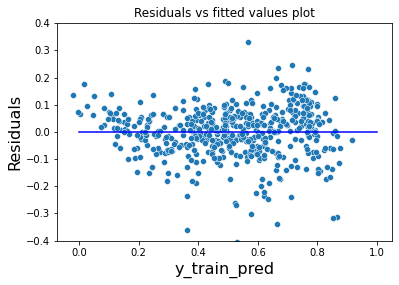

In [53]:
p = sns.scatterplot(y_train_pred, res)
plt.xlabel('y_train_pred', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.ylim(-0.4,0.4)
p = sns.lineplot([0,1], [0,0], color='blue')
p = plt.title('Residuals vs fitted values plot')

Text(0, 0.5, 'Users-Predicted_Users')

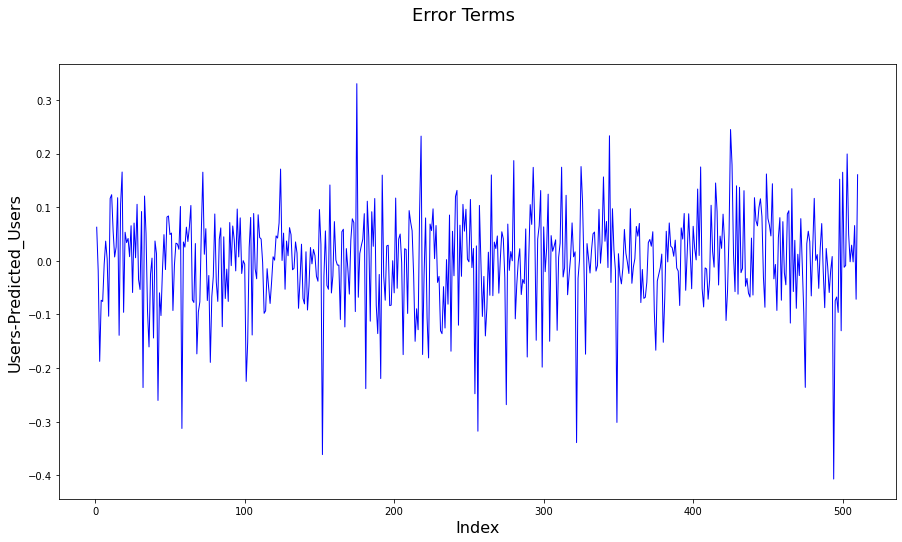

In [54]:
# Error terms
train_len = len(df_train.index) + 1
c = [i for i in range(1,train_len,1)]

fig = plt.figure(figsize=[15,8])
plt.plot(c, res, color="blue", linewidth=1, linestyle="-")
fig.suptitle('Error Terms', fontsize=18)              
plt.xlabel('Index', fontsize=16)                      
plt.ylabel('Users-Predicted_Users', fontsize=16)

### Observations:
There is no pattern in the error terms. It is just white noise which is randomly distributed.

So we can conclude that there is no varaible which will imporve the model futher upon its addition.
We can stop here

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 11th model.

In [55]:
df_test.shape

(220, 30)

In [56]:
# use the same scaler to transform the test variabels
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.551340,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.184403,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.084665,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.416134,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.535676,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.682271,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002662,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# creating X and Y test
y_test = df_test['cnt']
X_test = df_test[x_vars]

# adding constant to the X_test
X_test_sm = sm.add_constant(X_test)

# predict using the fitted model
y_test_pred = lm.predict(X_test_sm)

In [58]:
# check the r2 score and mean square error for test set
print("R squared value: ",r2_score(y_test, y_test_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_test_pred))

R squared value:  0.7941977535477243
Mean squared error:  0.009840286135133235


### Observation:

Train R squared value:  0.8303450237489229

Test R squared value:  0.7941977535477243

We have a good value of test R2, which is very close to the train R2. Hence our model is not overfit

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

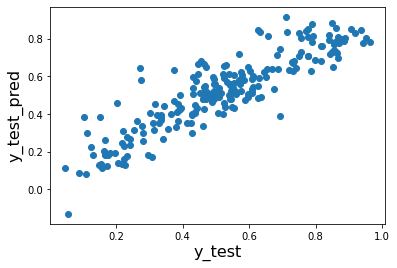

In [59]:
# Plot acutal vs predicted test values

plt.scatter(y_test, y_test_pred) 
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_test_pred', fontsize = 16)   
plt.show()

In [60]:
# print the coefficient values
lm.params

const           0.125926
temp            0.548008
yr              0.232861
season_2        0.088080
season_4        0.129345
weathersit_2   -0.078375
weathersit_3   -0.282869
windspeed      -0.153246
holiday        -0.098685
mnth_9          0.101195
dtype: float64

## Conclusion

- Temp has a coefficient value of 0.54, which is expected as we have seen a high correlation and a linear relationship between temp and cnt
- Weathersit variables have a high negative coefficient value. This is also expected as we have seen in the boxplot that we have more users in the clear sky and misty conditions
- Windspeed also has a negative coefficient value, which means that as the wind speed increases, number of bike users decrease

From the coefficient values, we can pick the top ones as our driver variables in predicting the demand for shared bikes

Top 3 variables that describe the bike demands:
1. Temperature - As the temperature increases, number of users also increase
2. Weather - The number of users are more in Clear sky and misty conditions. People prefer not to ride in cloudy or rainy conditions
3. Windspeed - We have more users when there are no strong winds




